<a href="https://colab.research.google.com/github/BrianBehnke/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [6]:
X = df[['make', 'body', 'mileage', 'engV', 
'engType', 'registration', 'year', 'drive']]

y = df['price'].values

print(X.head())
print(y)

   make  body  mileage  engV  engType  registration  year  drive
0    23     0       68   2.5        1             1  2010      1
1    50     3      173   1.8        1             1  2011      2
2    50     2      135   5.5        3             1  2008      2
3    50     5      162   1.8        0             1  2012      0
4    55     0       83   2.0        3             1  2013      1
[15500. 20500. 35000. ... 18500. 16999. 22500.]


In [103]:
df.isnull().sum()

make                    0
price                   0
body                    0
mileage                 0
engV                    0
engType                 0
registration            0
year                    0
drive                   0
make_squared            0
body_squared            0
mileage_squared         0
engV_squared            0
engType_squared         0
registration_squared    0
year_squared            0
drive_squared           0
ln_price                0
dtype: int64

In [47]:
df.describe()

,make,price,body,mileage,engV,engType,registration,year,drive,make_squared,body_squared,mileage_squared,engV_squared,engType_squared,registration_squared,year_squared,drive_squared,ln_price
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8.495000e+03,8495.000000,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,0.941613,2006.500883,0.575868,2767.018128,7.893349,29589.544085,35.615272,4.523367,0.941613,4.026094e+06,0.880989,9.187154
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,0.234488,6.925907,0.741235,2100.158298,7.659776,45443.957337,519.813492,4.266812,0.234488,2.772353e+04,1.391330,0.961828
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,0.000000,1959.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,3.837681e+06,0.000000,5.558179
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,1.000000,2004.000000,0.000000,529.000000,1.000000,5476.000000,2.560000,0.000000,1.000000,4.016016e+06,0.000000,8.610684
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,1.000000,2008.000000,0.000000,2500.000000,9.000000,16900.000000,4.000000,1.000000,1.000000,4.032064e+06,0.000000,9.159047
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,1.000000,2011.000000,1.000000,4624.000000,9.000000,38809.000000,6.250000,9.000000,1.000000,4.044121e+06,1.000000,9.749493
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,1.000000,2016.000000,2.000000,6724.000000,25.000000,998001.000000,9998.000100,9.000000,1.000000,4.064256e+06,4.000000,13.213666


## 1.2 Split the data into test and train datasets using train_test_split

In [59]:
# As a polynomial regression
# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))
print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 18590.46142183066
R^2 is 0.32788231510131516
coefficients:  -38.60757654537541
intercepts:  -2290142.05584031


In [58]:
# As a bivariate model
# Separate dependent and independent variables
y2 = df.loc[:, ['price']].values
X2 = df.loc[:, ['make_squared', 'body_squared', 'mileage_squared',
'engV_squared', 'engType_squared', 'registration_squared',
'year_squared', 'drive_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X2, y2, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))
print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 19483.077637512517
R^2 is 0.261789689619469
coefficients:  [-3.94672067e-01 -4.99821730e+02 -1.54926297e-02  2.33170846e-01
 -2.08779908e+02  6.04826165e+03  3.52320974e-01  3.50132433e+03]
intercepts:  [-1404592.86876725]


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [57]:
# As a multiple regression
# Separate dependent and independent variables
y3 = df.loc[:, ['price']].values
X3 = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 
                 'year', 'drive', 'make_squared', 'body_squared', 'mileage_squared',
                 'engV_squared', 'engType_squared', 'registration_squared',
                 'year_squared', 'drive_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X3, y3, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))
print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 16142.209669702452
R^2 is 0.49325327298764976
coefficients:  [-9.96495609e+01  1.04115335e+03 -8.68866932e+01  5.88481408e+03
 -5.48520508e+03  1.23941421e+03 -1.91718972e+05  2.26069802e+04
  7.83995223e-01 -1.86653296e+02  1.48073877e-01 -6.03280380e+01
  1.56637121e+03  1.23941421e+03  4.81580667e+01 -9.72619591e+03]
intercepts:  [1.90803382e+08]


## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [66]:
## Log-Linear Regression
# Using variables assigned above, X here
ylog = df.loc[:, ['ln_price']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, ylog, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.5643592878833026
R^2 is 0.6567530903730265
coefficients:  [-1.44984970e-03 -1.01196020e-01  1.37837870e-05  8.20943552e-03
 -6.28077318e-02  7.19528242e-01  9.35639300e-02  3.73452667e-01]
intercepts:  [-179.06060083]


In [67]:
## Log-Linear Regression
# Using variables assigned above, X2 and ylog

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X2, ylog, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE2 = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R22 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE2))
print('R^2 is {}'.format(R22))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.6078515114529396
R^2 is 0.6018100596186088
coefficients:  [-1.98959743e-05 -2.20839609e-02  6.00842359e-07 -1.37513149e-05
 -2.08452738e-02  7.19343356e-01  2.42387581e-05  1.56698907e-01]
intercepts:  [-88.90987296]


In [68]:
## Log-Linear Regression
# Using variables assigned above, X3 here and ylog

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X3, ylog, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE3 = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R23 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE3))
print('R^2 is {}'.format(R23))

print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 0.4608006913166855
R^2 is 0.7711654867530041
coefficients:  [-7.78857992e-04  4.06877295e-02  1.51980682e-04  2.00401190e-01
 -2.51086987e-01  3.39318458e-01 -5.67356752e+00  1.10934964e+00
 -5.92205540e-06 -1.24616407e-02  7.89714443e-07 -2.07248404e-03
  6.74830292e-02  3.39318458e-01  1.43974340e-03 -4.61095733e-01]
intercepts:  [5595.47369791]


## 1.5 Use the test data to make predictions

In [69]:
# As a polynomial regression with regular variables
print('polynomial regression with regular variables')
#RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
#R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2), '\n')


# As a bivariate model with squared variables
print('bivariate model with squared variables')
#RMSE2 = (np.sqrt(mean_squared_error(Y_test, y_pred)))
#R22 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE2))
print('R^2 is {}'.format(R22), '\n')

# As a multiple regression with both regular and squared variables
print('multiple regression with both regular and squared variables')
#RMSE3 = (np.sqrt(mean_squared_error(Y_test, y_pred)))
#R23 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE3))
print('R^2 is {}'.format(R23))
print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

polynomial regression with regular variables
RMSE is 0.5643592878833026
R^2 is 0.6567530903730265 

bivariate model with squared variables
RMSE is 0.6078515114529396
R^2 is 0.6018100596186088 

multiple regression with both regular and squared variables
RMSE is 0.4608006913166855
R^2 is 0.7711654867530041
coefficients:  [-7.78857992e-04  4.06877295e-02  1.51980682e-04  2.00401190e-01
 -2.51086987e-01  3.39318458e-01 -5.67356752e+00  1.10934964e+00
 -5.92205540e-06 -1.24616407e-02  7.89714443e-07 -2.07248404e-03
  6.74830292e-02  3.39318458e-01  1.43974340e-03 -4.61095733e-01]
intercepts:  [5595.47369791]


Our RMSE  represents error in percentage terms. We're on agerage about 46.1% off in our predictions of house prices.

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [72]:
# I calculated these all above, I think
# As a polynomial regression with regular variables
print('polynomial regression with regular variables')

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2), '\n')

# As a bivariate model with squared variables
print('bivariate model with squared variables')

print('RMSE is {}'.format(RMSE2))
print('R^2 is {}'.format(R22), '\n')


# As a multiple regression with both regular and squared variables
print('multiple regression with both regular and squared variables')

print('RMSE is {}'.format(RMSE3))
print('R^2 is {}'.format(R23))


polynomial regression with regular variables
RMSE is 0.5643592878833026
R^2 is 0.6567530903730265 

bivariate model with squared variables
RMSE is 0.6078515114529396
R^2 is 0.6018100596186088 

multiple regression with both regular and squared variables
RMSE is 0.4608006913166855
R^2 is 0.7711654867530041


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

I think the year feature's coefficient is sufficiently large to show that it has a large affect on the price of the vehicle

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE is 0.4608006913166855

With an RMSE we can say we are on average about 46.1% off on our price predictions using these feauture. 

## 1.9 How should we interpret the $R^2$?

R^2 is 0.17765374557597213

A low R^2 shows that the features do a good job of explaining the variance we see in the data.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
## generate our ln(price) variable
df['ln_price'] = np.log(df['price'])

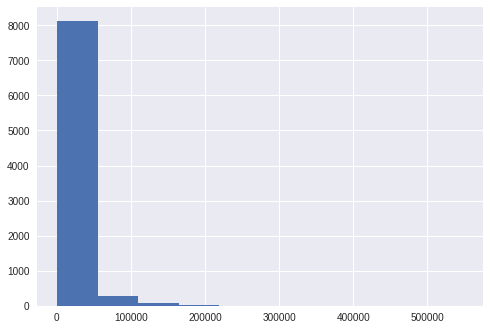

In [50]:
df.price.hist()

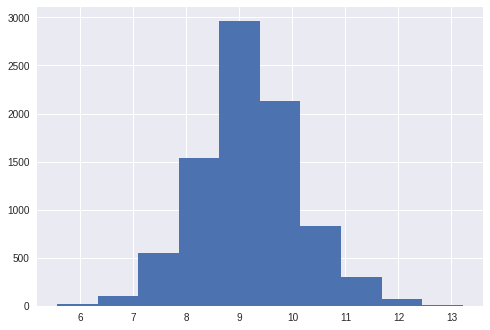

In [51]:
df.ln_price.hist()

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

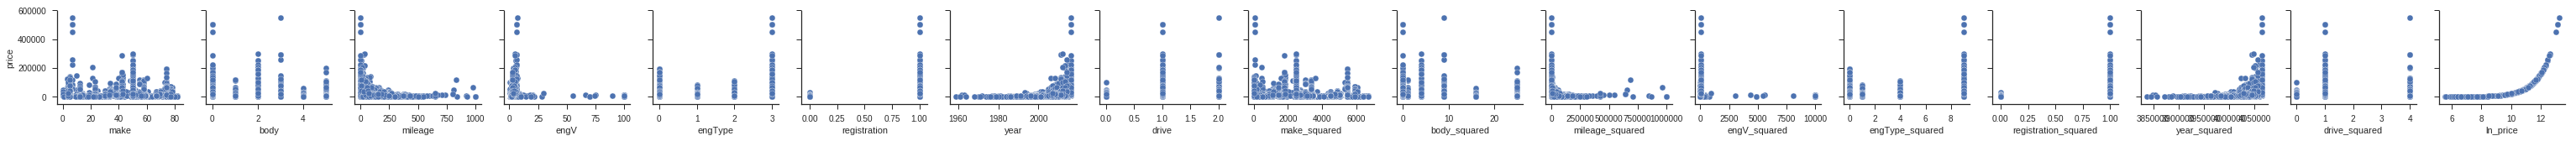

In [53]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns);

## 2.3 If appropriate, create any polynomial features. 

In [54]:
df['make_squared'] = df['make']**2
df['body_squared'] = df['body']**2
df['mileage_squared'] = df['mileage']**2
df['engV_squared'] = df['engV']**2
df['engType_squared'] = df['engType']**2
df['registration_squared'] = df['registration']**2
df['year_squared'] = df['year']**2
df['drive_squared'] = df['drive']**2
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,make_squared,body_squared,mileage_squared,engV_squared,engType_squared,registration_squared,year_squared,drive_squared,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,529,0,4624,6.25,1,1,4040100,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,2500,9,29929,3.24,1,1,4044121,4,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,2500,4,18225,30.25,9,1,4032064,4,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,2500,25,26244,3.24,0,1,4048144,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,3025,0,6889,4.00,9,1,4052169,1,9.717158


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [56]:
# As a multiple regression
# Separate dependent and independent variables
y3 = df.loc[:, ['price']].values
X3 = df.loc[:, ['make', 'body', 'mileage', 'engV', 'engType', 'registration', 
                 'year', 'drive', 'make_squared', 'body_squared', 'mileage_squared',
                 'engV_squared', 'engType_squared', 'registration_squared',
                 'year_squared', 'drive_squared']].values

# Slit into test and train datasets
X_train, X_test, Y_train, Y_test = train_test_split(X3, y3, test_size=.5, random_state=15)

# fit model using train datasets
model = LinearRegression()
model.fit(X_train, Y_train)

# Create new predictions using x_test
y_pred = model.predict(X_test)

# Measure Accuracy using y_test and y_pred
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))
print("coefficients: ", model.coef_[0])
print("intercepts: ", model.intercept_)

RMSE is 16142.209669702452
R^2 is 0.49325327298764976
coefficients:  [-9.96495609e+01  1.04115335e+03 -8.68866932e+01  5.88481408e+03
 -5.48520508e+03  1.23941421e+03 -1.91718972e+05  2.26069802e+04
  7.83995223e-01 -1.86653296e+02  1.48073877e-01 -6.03280380e+01
  1.56637121e+03  1.23941421e+03  4.81580667e+01 -9.72619591e+03]
intercepts:  [1.90803382e+08]


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The year still shows a high affect on variability of price, around 4.8% of the price variation seems to be an affect of year.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent looks to minimize the values for each value of a function. Once the minimum values are found for each, you have reached the optimal value of the function.

## 3.2 What is the "Learning Rate" and what is its function?

Learning rate is how quickly feature parameters are iterated over to find the optimal result. The rate is how far each "step" is towards the minimum and is controlled by the developer. These steps serve to move in towards the optial incremetally until the minimum is reached. 

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [73]:
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,make_squared,body_squared,mileage_squared,engV_squared,engType_squared,registration_squared,year_squared,drive_squared,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,529,0,4624,6.25,1,1,4040100,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,2500,9,29929,3.24,1,1,4044121,4,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,2500,4,18225,30.25,9,1,4032064,4,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,2500,25,26244,3.24,0,1,4048144,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,3025,0,6889,4.00,9,1,4052169,1,9.717158


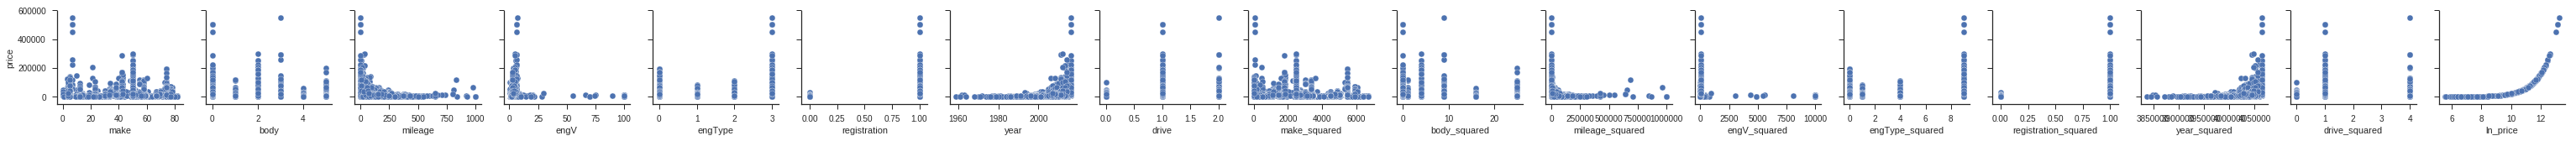

In [74]:
sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns);

In [76]:
df.isna().sum().sum()

0

In [80]:
df_drop = df.drop(['registration', 'registration_squared', 'drive', 'drive_squared'], axis=1)
df_drop.head().T

,0,1,2,3,4
make,2.300000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.500000e+01
price,1.550000e+04,2.050000e+04,3.500000e+04,1.780000e+04,1.660000e+04
body,0.000000e+00,3.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00
mileage,6.800000e+01,1.730000e+02,1.350000e+02,1.620000e+02,8.300000e+01
engV,2.500000e+00,1.800000e+00,5.500000e+00,1.800000e+00,2.000000e+00
engType,1.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00
year,2.010000e+03,2.011000e+03,2.008000e+03,2.012000e+03,2.013000e+03
make_squared,5.290000e+02,2.500000e+03,2.500000e+03,2.500000e+03,3.025000e+03
body_squared,0.000000e+00,9.000000e+00,4.000000e+00,2.500000e+01,0.000000e+00
mileage_squared,4.624000e+03,2.992900e+04,1.822500e+04,2.624400e+04,6.889000e+03


In [81]:
df_drop.describe()

,make,price,body,mileage,engV,engType,year,make_squared,body_squared,mileage_squared,engV_squared,engType_squared,year_squared,ln_price
count,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8495.000000,8.495000e+03,8495.000000
mean,46.535491,16185.453305,2.302295,141.744202,2.568337,1.650618,2006.500883,2767.018128,7.893349,29589.544085,35.615272,4.523367,4.026094e+06,9.187154
std,24.526251,24449.641512,1.610307,97.464062,5.387238,1.341282,6.925907,2100.158298,7.659776,45443.957337,519.813492,4.266812,2.772353e+04,0.961828
min,0.000000,259.350000,0.000000,0.000000,0.100000,0.000000,1959.000000,0.000000,0.000000,0.000000,0.010000,0.000000,3.837681e+06,5.558179
25%,23.000000,5490.000000,1.000000,74.000000,1.600000,0.000000,2004.000000,529.000000,1.000000,5476.000000,2.560000,0.000000,4.016016e+06,8.610684
50%,50.000000,9500.000000,3.000000,130.000000,2.000000,1.000000,2008.000000,2500.000000,9.000000,16900.000000,4.000000,1.000000,4.032064e+06,9.159047
75%,68.000000,17145.600000,3.000000,197.000000,2.500000,3.000000,2011.000000,4624.000000,9.000000,38809.000000,6.250000,9.000000,4.044121e+06,9.749493
max,82.000000,547800.000000,5.000000,999.000000,99.990000,3.000000,2016.000000,6724.000000,25.000000,998001.000000,9998.000100,9.000000,4.064256e+06,13.213666


In [94]:
Xdrop = df_drop[['make', 'body', 'mileage', 'engV', 
'engType', 'year']] 

ydrop = df_drop['price']
Xdrop.head()
#ydrop.head()

,make,body,mileage,engV,engType,year
0,23,0,68,2.5,1,2010
1,50,3,173,1.8,1,2011
2,50,2,135,5.5,3,2008
3,50,5,162,1.8,0,2012
4,55,0,83,2.0,3,2013


In [95]:
# Use Statsmodels to run a regression

# This is like using np.ones to add a vector of ones
Xdrop = sm.add_constant(Xdrop)

model = sm.OLS(ydrop, Xdrop).fit()
predictions = model.predict(Xdrop) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     410.9
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:53:01   Log-Likelihood:                -96807.
No. Observations:                8495   AIC:                         1.936e+05
Df Residuals:                    8488   BIC:                         1.937e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.945e+06   8.01e+04    -24.269      0.0

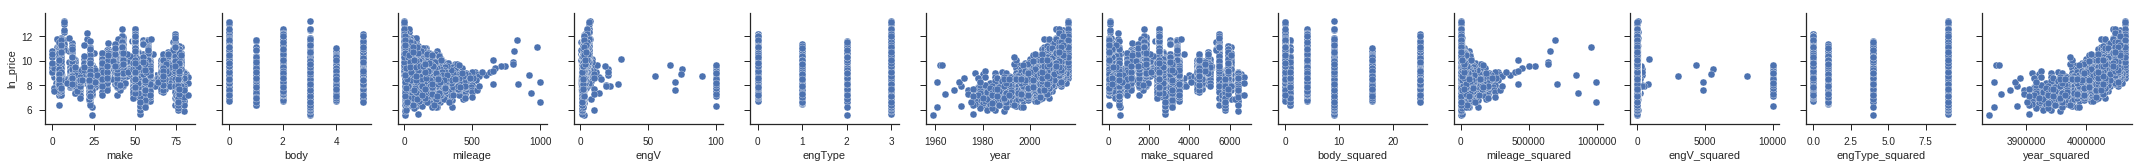

In [96]:
#df['ln_price'] = np.log(df['price']) -- Already did this step above

sns.set(style="ticks", color_codes=True)

# Generate a list of column headers not including price
x_columns = df_drop.columns.drop(['price','ln_price'])

# Only plot the scatterplot of x variables with our y variable
fig = sns.pairplot(data=df_drop, y_vars=['ln_price'], x_vars=x_columns)

In [98]:
Xdrop2 = df_drop[['make', 'body', 'mileage', 'engV', 
'engType', 'year']] 

ydrop2 = df_drop['ln_price']

# Use Statsmodels to run a regression
# This is like using np.ones to add a vector of ones
Xdrop2 = sm.add_constant(Xdrop2)

model = sm.OLS(ydrop2, Xdrop2).fit()
predictions = model.predict(Xdrop) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1724.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:53:47   Log-Likelihood:                -8337.5
No. Observations:                8495   AIC:                         1.669e+04
Df Residuals:                    8488   BIC:                         1.674e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -169.1678      2.404    -70.356      0.0

In [99]:
# Lets run our regression again using Robust Standard Errors
# cov_type='HC3' parameter to .fit() function

Xdrop2 = df_drop[['make', 'body', 'mileage', 'engV', 
'engType', 'year']] 

ydrop2 = df_drop['ln_price']

# Use Statsmodels to run a regression
# This is like using np.ones to add a vector of ones
Xdrop2 = sm.add_constant(Xdrop2)

model = sm.OLS(ydrop2, Xdrop2).fit(cov_type='HC3')
predictions = model.predict(Xdrop) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        17:54:00   Log-Likelihood:                -8337.5
No. Observations:                8495   AIC:                         1.669e+04
Df Residuals:                    8488   BIC:                         1.674e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -169.1678      3.650    -46.348      0.0

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(Xdrop2.columns, '\n')

vif = [variance_inflation_factor(Xdrop2.values, i) for i in range(Xdrop2.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'year'], dtype='object') 

[117714.01058340985, 1.0048803071479657, 1.1120372905881126, 1.530325341082054, 1.0042588401854933, 1.113059322623083, 1.3915669890199107]


In [101]:
no_const = Xdrop2.drop('const', axis=1)
no_const.corr()

,make,body,mileage,engV,engType,year
make,1.000000,0.026127,-0.035097,-0.021246,-0.011880,-0.013833
body,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.154554
mileage,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.503135
engV,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.041076
engType,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,-0.040471
year,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,1.000000


Since I have low(<10) VIF scores for all of my X variables as well as low correlation between all X variables, I would surmise that I have no multicollinearity problems with this data.